In [242]:
import pandas as pd           
import matplotlib.pyplot as plt

In [243]:
def analyze_different_vp(data_set):
    """
    Analyze different values of Vp (Voting Power) in the dataset.

    Args:
        data_set (str): Path to the dataset file.

    Returns:
        dict: A dictionary containing occurrences of each Vp value.
    """
    occurrences = {}
    df = pd.read_csv(data_set)
    for vp in df["Vp"]:
        if vp not in occurrences:
            occurrences[vp] = 1
        else:
            occurrences[vp] += 1
    return occurrences

def analyze_mean_vp(df):
    """
    Calculate the mean value of Vp (Voting Power) in the dataset.

    Args:
        df (DataFrame): DataFrame containing the dataset.

    Returns:
        float: The mean value of Vp.
    """
    vp_mean = df["Vp"].mean()
    return vp_mean

def analyze_mean_turn(df):
    """
    Calculate the mean number of turns in the dataset.

    Args:
        df (DataFrame): DataFrame containing the dataset.

    Returns:
        float: The mean number of turns.
    """
    turn_mean = df["numberOfTurn"].mean()
    return turn_mean

def analyze_different_number_of_turn(data_set):
    """
    Analyze different values of number of turns in the dataset.

    Args:
        data_set (str): Path to the dataset file.

    Returns:
        dict: A dictionary containing occurrences of each number of turns.
    """
    occurrences = {}
    df = pd.read_csv(data_set)
    for turn in df["numberOfTurn"]:
        if turn not in occurrences:
            occurrences[turn] = 1
        else:
            occurrences[turn] += 1
    return occurrences

def graph_number_of_turn(data_set):
    """
    Create a bar graph showing the occurrences of different number of turns.

    Args:
        data_set (str): Path to the dataset file.
    """
    data = analyze_different_number_of_turn(data_set)
    turns = list(data.keys())
    occurrences = list(data.values())
    bar_width = max(0.5, min(0.15 * len(turns), 0.5)) 

    # Create the bar graph
    plt.bar(turns, occurrences, color='blue', width=bar_width)

    # Add titles and labels
    plt.title('Occurrences of Turns')
    plt.xlabel('Number of Turns')
    plt.ylabel('Occurrences')
    plt.xticks(turns)
    plt.show()
    plt.clf()

def graph_vp(data_set):
    """
    Create a bar graph showing the occurrences of different Vp values.

    Args:
        data_set (str): Path to the dataset file.
    """
    data = analyze_different_vp(data_set)
    vps = list(data.keys())
    occurrences = list(data.values())

    # Create the bar graph
    plt.bar(vps, occurrences, color='blue', width=0.005)

    # Add titles and labels
    plt.title('Vp Occurrences')
    plt.xlabel('Vp')
    plt.ylabel('Occurrences')
    plt.xticks(vps)
    plt.show()
    plt.clf()


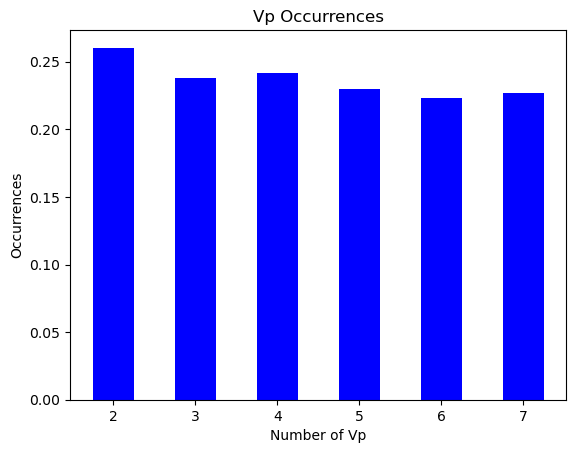

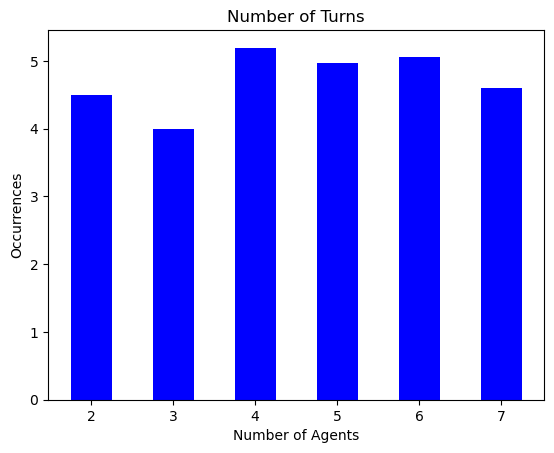

<Figure size 640x480 with 0 Axes>

In [244]:
import os

def create_csv_link(folder):
    """
    Create a list of DataFrame objects from CSV files in the specified folder.

    Args:
        folder (str): Path to the folder containing CSV files.

    Returns:
        list: List of DataFrame objects.
    """
    # Check if the specified path is a folder
    if not os.path.isdir(folder):
        return "The specified path is not a folder."

    # Initialize the list of DataFrame objects
    df_list = []

    # Iterate over all items in the folder
    for item in os.listdir(folder):
        item_path = os.path.join(folder, item)
        # Check if the item is a file
        if os.path.isfile(item_path):
            df = pd.read_csv(item_path)
            df_list.append(df)

    return df_list


def all_graph_stat_vp(df_list):
    """
    Calculate the mean Voting Power (Vp) for each number of agents from a list of DataFrame objects.

    Args:
        df_list (list): List of DataFrame objects.

    Returns:
        dict: A dictionary containing the mean Vp for each number of agents.
    """
    occurrences = {}
    for df in df_list:
        num_agents = len(df["order"][0].split(","))
        if num_agents in occurrences:
            occurrences[num_agents] = [
                analyze_mean_vp(df) + occurrences[num_agents][0],
                occurrences[num_agents][1] + 1
            ]
        else:
            occurrences[num_agents] = [analyze_mean_vp(df), 1]

    response = {}
    for key, value in occurrences.items():
        response[key] = value[0] / value[1]
    return response


def all_graph_stat_turn(df_list):
    """
    Calculate the mean number of turns for each number of agents from a list of DataFrame objects.

    Args:
        df_list (list): List of DataFrame objects.

    Returns:
        dict: A dictionary containing the mean number of turns for each number of agents.
    """
    occurrences = {}
    for df in df_list:
        num_agents = len(df["order"][0].split(","))
        if num_agents in occurrences:
            occurrences[num_agents] = [
                analyze_mean_turn(df) + occurrences[num_agents][0],
                occurrences[num_agents][1] + 1
            ]
        else:
            occurrences[num_agents] = [analyze_mean_turn(df), 1]

    response = {}
    for key, value in occurrences.items():
        response[key] = value[0] / value[1]
    return response


def analyze_mean_vp(df):
    """
    Calculate the mean Voting Power (Vp) from a DataFrame.

    Args:
        df (DataFrame): DataFrame containing the dataset.

    Returns:
        float: The mean Vp.
    """
    vp_mean = df["Vp"].mean()
    return vp_mean


def analyze_mean_turn(df):
    """
    Calculate the mean number of turns from a DataFrame.

    Args:
        df (DataFrame): DataFrame containing the dataset.

    Returns:
        float: The mean number of turns.
    """
    turn_mean = df["numberOfTurn"].mean()
    return turn_mean


def display_graph_vp(data):
    """
    Display a bar graph showing the occurrences of different Vp values.

    Args:
        data (dict): Dictionary containing the occurrences of Vp values.
    """
    vp = list(data.keys())
    occurrences = list(data.values())
    bar_width = max(0.5, min(0.15 * len(vp), 0.5))

    # Create the bar graph
    plt.bar(vp, occurrences, color='blue', width=bar_width)

    # Add titles and labels
    plt.title('Vp Occurrences')
    plt.xlabel('Number of Vp')
    plt.ylabel('Occurrences')
    plt.xticks(vp)
    plt.show()
    plt.clf()


def display_graph_turn(data):
    """
    Display a bar graph showing the mean number of turns for each number of agents.

    Args:
        data (dict): Dictionary containing the mean number of turns for each number of agents.
    """
    num_agents = list(data.keys())
    occurrences = list(data.values())
    bar_width = max(0.5, min(0.15 * len(num_agents), 0.5))

    # Create the bar graph
    plt.bar(num_agents, occurrences, color='blue', width=bar_width)

    # Add titles and labels
    plt.title('Number of Turns')
    plt.xlabel('Number of Agents')
    plt.ylabel('Occurrences')
    plt.xticks(num_agents)
    plt.show()
    plt.clf()


path = "csv_iteration_4/same_ug_new_agents_csv_1"
df_list = create_csv_link(path)
display_graph_vp(all_graph_stat_vp(df_list))
display_graph_turn(all_graph_stat_turn(df_list))


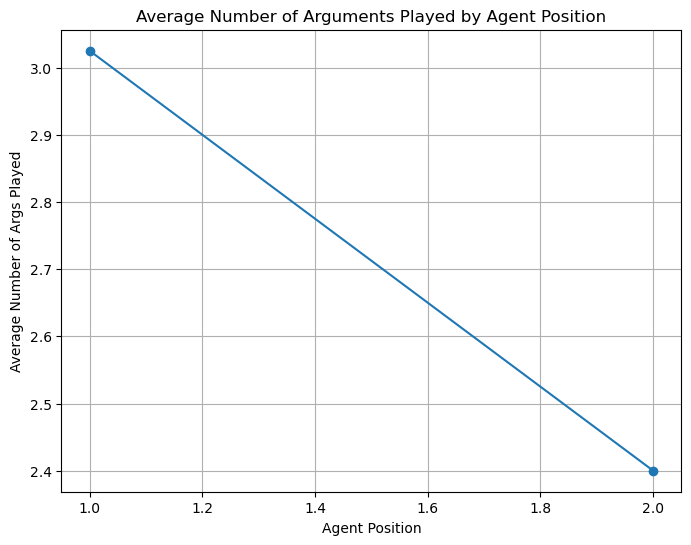

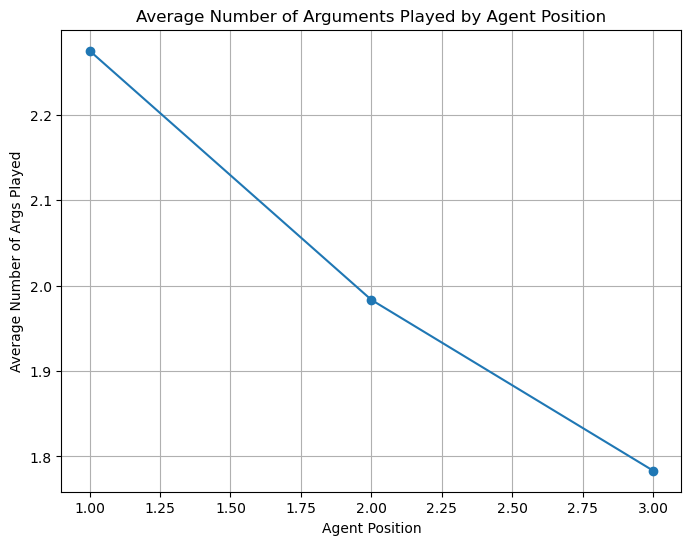

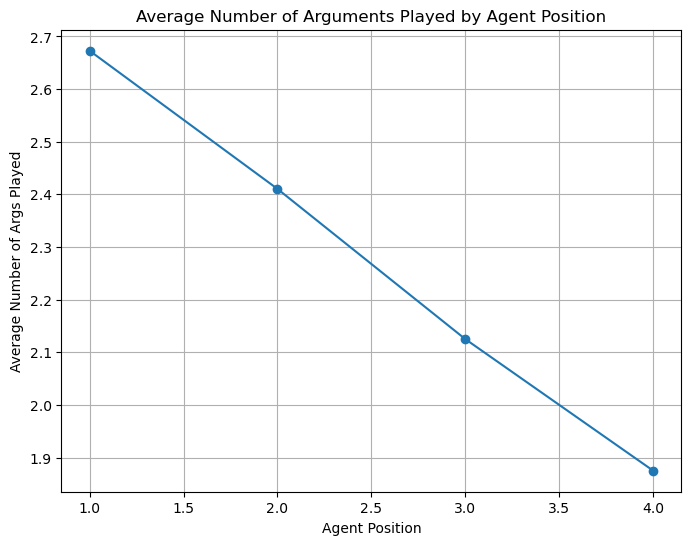

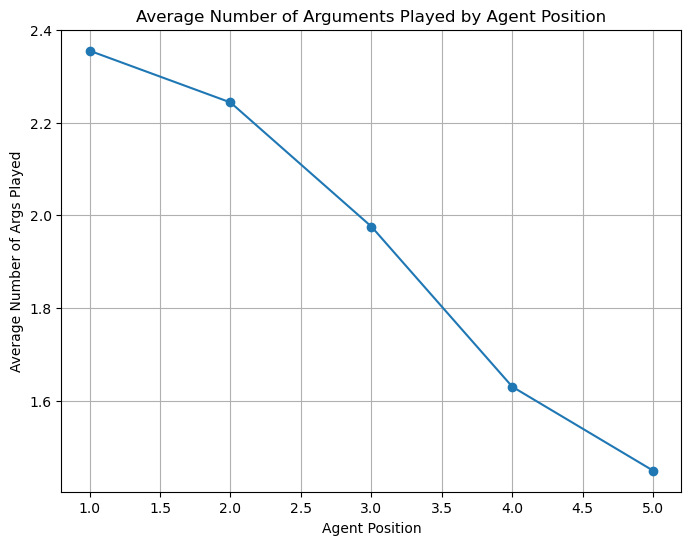

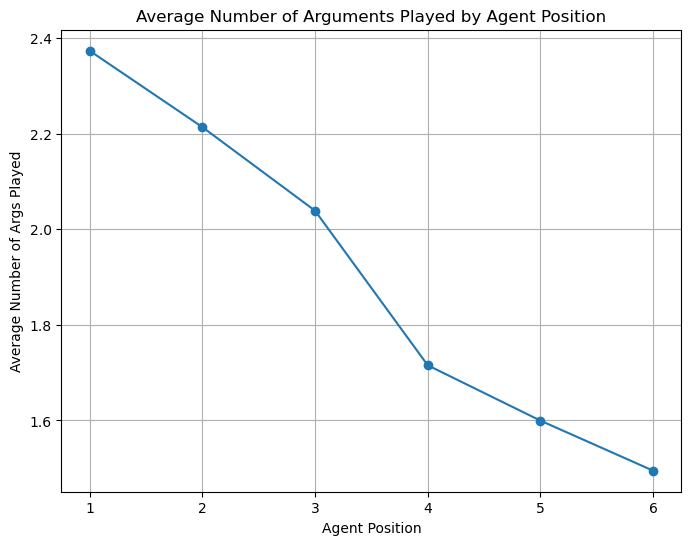

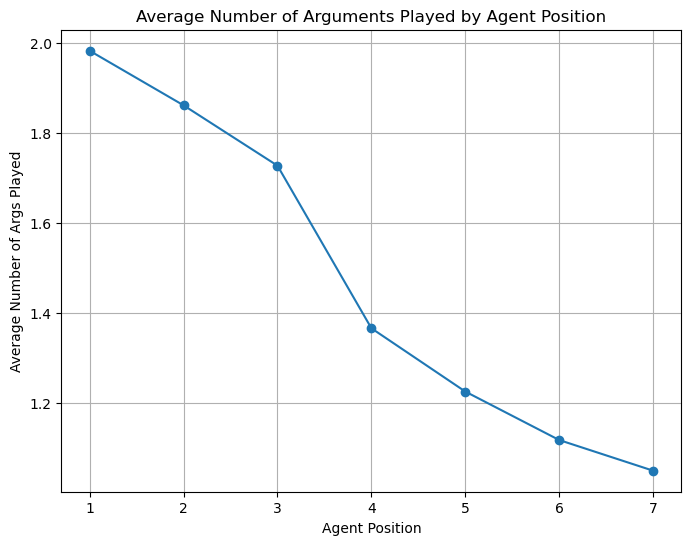

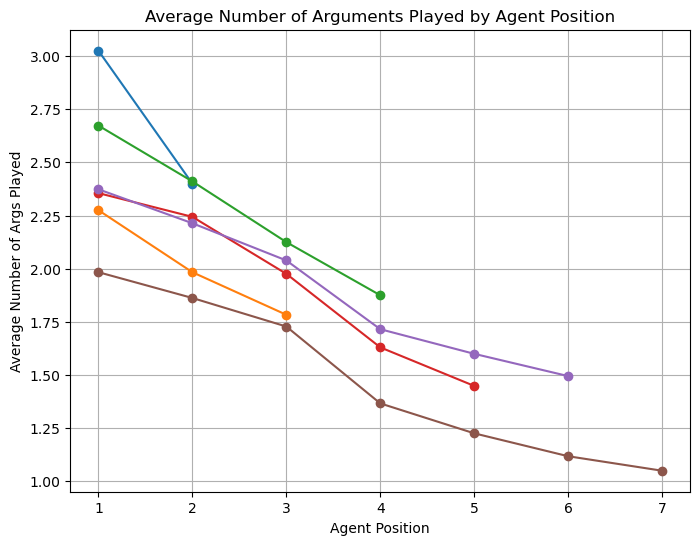

In [245]:
def number_of_arguments_played(dataframes, num_args):
    """
    Calculate the average number of arguments played by agents for each position.

    Args:
        dataframes (list): List of DataFrame objects.
        num_args (int): Number of arguments.

    Returns:
        dict: A dictionary containing the average number of arguments played by agents for each position.
    """
    size = len(dataframes[0])
    arg_count = {}
    for i in range(num_args):
        arg_count[i+1] = 0
    
    for df in dataframes:
        for j in range(size):
            order = 1
            for i in df["order"][j].split(","):
                arg_count[order] = int(df[i[1]][j].split("None")[-1].split(",")[1]) + arg_count[order]
                order += 1
    
    for i in range(num_args):
        arg_count[i+1] = arg_count[i+1] / (size * len(dataframes))
   
    return arg_count

def display_graph(dictionary):
    """
    Display a line graph showing the average number of arguments played by agents for each position.

    Args:
        dictionary (dict): Dictionary containing the average number of arguments played by agents for each position.
    """
    # Extract keys and values from the dictionary
    keys = list(dictionary.keys())
    values = list(dictionary.values())
    
    # Create the graph
    plt.figure(figsize=(8, 6))
    plt.plot(keys, values, marker='o', linestyle='-')
    
    # Add labels and a title
    plt.xlabel('Agent Position')
    plt.ylabel('Average Number of Args Played')
    plt.title('Average Number of Arguments Played by Agent Position')
    
    # Display the graph
    plt.grid(True)
    plt.show()

def display_all_graphs(dataframes):
    """
    Display line graphs for the average number of arguments played by agents for each position.

    Args:
        dataframes (list): List of DataFrame objects.
    """
    plt.figure(figsize=(8, 6))
    for i in range(2, 8):
        dictionary = number_of_arguments_played(create_agent_number(i, dataframes), i)
        keys = list(dictionary.keys())
        values = list(dictionary.values())
        plt.plot(keys, values, marker='o', linestyle='-')
    
    # Add labels and a title
    plt.xlabel('Agent Position')
    plt.ylabel('Average Number of Args Played')
    plt.title('Average Number of Arguments Played by Agent Position')
    
    # Display the graph
    plt.grid(True)
    plt.show()
  
def create_agent_number(number, dataframes):
    """
    Create a list of DataFrame objects with a specific number of agents.

    Args:
        number (int): Number of agents.
        dataframes (list): List of DataFrame objects.

    Returns:
        list: List of DataFrame objects with the specified number of agents.
    """
    agent_list = [] 
    for df in dataframes:
        if len(df["order"][0].split(",")) == number:
            agent_list.append(df)
    return agent_list

# Assuming 'df_list' is defined elsewhere
for i in range(2, 8):
    display_graph(number_of_arguments_played(create_agent_number(i, df_list), i))
    
display_all_graphs(df_list)


[['False', ' 2', ' 6]'], ['False', ' 0', ' 3]'], ['False', ' 2', ' 6]'], ['True', ' 2', ' 17]'], ['True', ' 1', ' 9]'], ['False', ' 2', ' 5]'], ['True', ' 1', ' 25]'], ['True', ' 1', ' 17]'], ['True', ' 1', ' 9]'], ['False', ' 2', ' 2]'], ['True', ' 1', ' 19]'], ['False', ' 1', ' 4]'], ['True', ' 1', ' 14]'], ['True', ' 1', ' 6]'], ['True', ' 1', ' 11]'], ['True', ' 1', ' 21]'], ['True', ' 0', ' 23]'], ['False', ' 3', ' 3]'], ['True', ' 0', ' 4]'], ['True', ' 1', ' 17]'], ['True', ' 3', ' 24]'], ['False', ' 2', ' 4]'], ['True', ' 1', ' 15]'], ['True', ' 1', ' 14]'], ['True', ' 0', ' 7]'], ['True', ' 0', ' 24]'], ['True', ' 0', ' 15]'], ['False', ' 2', ' 2]'], ['False', ' 1', ' 2]'], ['False', ' 3', ' 6]'], ['True', ' 1', ' 8]'], ['True', ' 1', ' 17]'], ['True', ' 1', ' 21]'], ['True', ' 0', ' 6]'], ['False', ' 1', ' 7]'], ['True', ' 1', ' 5]'], ['True', ' 1', ' 28]'], ['False', ' 1', ' 1]'], ['True', ' 1', ' 25]'], ['True', ' 0', ' 19]'], ['True', ' 0', ' 11]'], ['True', ' 1', ' 5]'], 

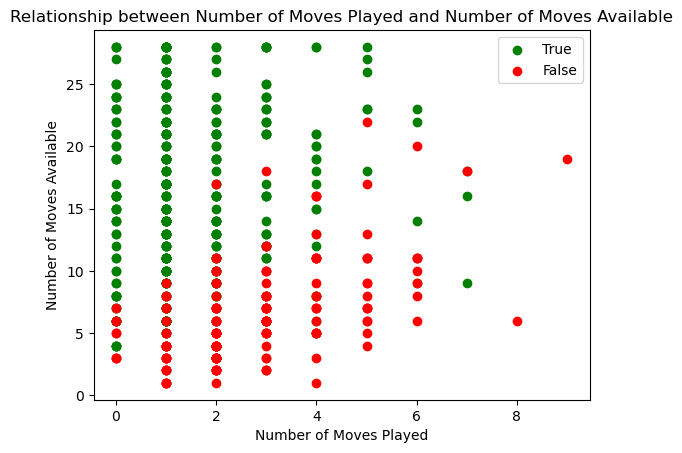

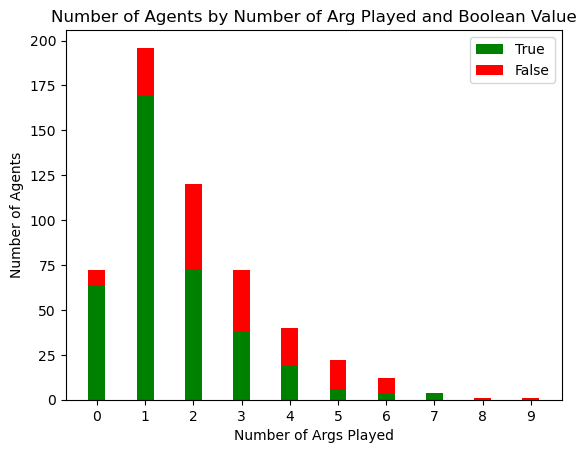

In [246]:
import numpy as np

def extract_argument_play_data(dfs):
    """
    Extracts data points for the number of arguments played.

    Args:
        dfs (list): List of DataFrames.

    Returns:
        list: A list containing data points for the number of arguments played.
    """
    data_points = []
    for df in dfs:
        for i in range(len(df["order"][0].split(","))):
            boolean = df[f"{i}"][0].split(",")[1].strip()
            nb_coup_play = df[f"{i}"][0].split("None")[-1].split(",")[1]
            nb_coup_possible = df[f"{i}"][0].split("None")[-1].split(",")[3]
            data_points.append([boolean, nb_coup_play, nb_coup_possible])
    return data_points

def plot_agents_bar_chart(data):
    """
    Plots a bar chart for agent data.

    Args:
        data (list): List containing agent data points.
    """
    # Create a dictionary to store the number of agents by number of moves played and boolean value
    agent_counts = {}
    for item in data:
        # Get the number of moves and the boolean value
        coup = int(item[1].strip())
        boolean = item[0]

        # Update the dictionary
        if coup not in agent_counts:
            agent_counts[coup] = {'True': 0, 'False': 0}
        agent_counts[coup][boolean] += 1

    # Prepare data for the chart
    coups = sorted(agent_counts.keys())
    true_counts = [agent_counts[coup]['True'] for coup in coups]
    false_counts = [agent_counts[coup]['False'] for coup in coups]

    # Create the bar chart
    width = 0.35  # Width of the bars
    fig, ax = plt.subplots()
    ind = np.arange(len(coups))  # Bar positions

    p1 = ax.bar(ind, true_counts, width, color='green', label='True')
    p2 = ax.bar(ind, false_counts, width, color='red', bottom=true_counts, label='False')

    ax.set_xlabel('Number of Args Played')
    ax.set_ylabel("Number of Agents")
    ax.set_title('Number of Agents by Number of Arg Played and Boolean Value')

    ax.set_xticks(ind)
    ax.set_xticklabels(coups)
    ax.legend()

    plt.show()

# Extract data points for the number of arguments played
data = extract_argument_play_data(df_list)
print(data)

# Clean the data and convert values to integers
cleaned_data = [[d[0].strip(), d[1].strip(), d[2].strip()] for d in data]

# Separate the data into two lists: one for 'True' values and one for 'False' values
true_values = [(int(d[1]), int(d[2][:-1])) for d in cleaned_data if d[0] == 'True']
false_values = [(int(d[1]), int(d[2][:-1])) for d in cleaned_data if d[0] == 'False']

# Check if the lists are empty
if true_values:
    true_x, true_y = zip(*true_values)
else:
    true_x, true_y = [], []

if false_values:
    false_x, false_y = zip(*false_values)
else:
    false_x, false_y = [], []

# Create the scatter plot
plt.scatter(true_x, true_y, color='green', label='True')
plt.scatter(false_x, false_y, color='red', label='False')

# Add a legend
plt.legend()

# Add labels
plt.xlabel('Number of Moves Played')
plt.ylabel('Number of Moves Available')

# Show the plot
plt.title('Relationship between Number of Moves Played and Number of Moves Available')
plt.show()

# Plot the bar chart
plot_agents_bar_chart(data)


In [247]:
import pandas as pd
import os

def calculate_vp_statistics(df_list):
    """
    Calculate statistics for the 'Vp' column in the DataFrame list.

    Args:
        df_list (list): List of DataFrames.

    Returns:
        dict: A dictionary containing statistics for 'Vp' column.
    """
    occurrences = {}
    for df in df_list:
        for i in df["Vp"]:
            if i in occurrences:
                occurrences[i] += 1
            else:
                occurrences[i] = 1
    return occurrences

def calculate_turn_statistics(df_list):
    """
    Calculate statistics for the 'numberOfTurn' column in the DataFrame list.

    Args:
        df_list (list): List of DataFrames.

    Returns:
        dict: A dictionary containing statistics for 'numberOfTurn' column.
    """
    occurrences = {}
    for df in df_list:
        for i in df["numberOfTurn"]:
            if i in occurrences:
                occurrences[i] += 1
            else:
                occurrences[i] = 1
    return occurrences

def create_agent_number(number, df_list):
    """
    Create a list of DataFrames with a specific number of agents.

    Args:
        number (int): Number of agents.
        df_list (list): List of DataFrames.

    Returns:
        list: A list of DataFrames with the specified number of agents.
    """
    result = []
    for df in df_list:
        if len(df["order"][0].split(",")) == number:
            result.append(df)
    return result

def number_argument_play_all_point(dfs):
    """
    Extract data points for the number of arguments played.

    Args:
        dfs (list): List of DataFrames.

    Returns:
        list: A list containing data points for the number of arguments played.
    """
    data_points = []
    for df in dfs:
        for i in range(len(df["order"][0].split(","))):
            boolean = df[f"{i}"][0].split(",")[1].strip()
            nb_coup_play = df[f"{i}"][0].split("None")[-1].split(",")[1]
            nb_coup_possible = df[f"{i}"][0].split("None")[-1].split(",")[3]
            data_points.append([boolean, nb_coup_play, nb_coup_possible])
    return data_points

def plot_agents_bar_chart(data):
    """
    Plot a bar chart for agent data.

    Args:
        data (list): List containing agent data points.
    """
    agent_counts = {}
    for item in data:
        coup = int(item[1].strip())
        boolean = item[0]
        if coup not in agent_counts:
            agent_counts[coup] = {'True': 0, 'False': 0}
        agent_counts[coup][boolean] += 1

    coups = sorted(agent_counts.keys())
    true_counts = [agent_counts[coup]['True'] for coup in coups]
    false_counts = [agent_counts[coup]['False'] for coup in coups]

    width = 0.35
    fig, ax = plt.subplots()
    ind = np.arange(len(coups))

    p1 = ax.bar(ind, true_counts, width, color='green', label='True')
    p2 = ax.bar(ind, false_counts, width, color='red', bottom=true_counts, label='False')

    ax.set_xlabel('Number of Args Played')
    ax.set_ylabel("Number of Agents")
    ax.set_title('Number of Agents by Number of Arg Played and Boolean Value')

    ax.set_xticks(ind)
    ax.set_xticklabels(coups)
    ax.legend()

    plt.show()

# Calculate statistics for 'Vp' column
vp_statistics = calculate_vp_statistics(df_list)

# Calculate statistics for 'numberOfTurn' column
turn_statistics = calculate_turn_statistics(df_list)

# Create a DataFrame with the calculated statistics
df = pd.DataFrame({'vp': vp_statistics, 'tour': turn_statistics})

# Add more statistics columns to the DataFrame
for i in range(2, 8):
    temp_data = number_of_arguments_played(create_agent_number(i, df_list), i)
    new_df = pd.DataFrame(temp_data, index=[f"nbCoup/byTurnW{i}"]).T
    df = pd.concat([df, new_df], axis=1)

# Print a specific column
print(df["nbCoup/byTurnW2"])

# Export the DataFrame to a CSV file
csv_folder_path = "csv/csv_UG"
if not os.path.exists(csv_folder_path):
    os.makedirs(csv_folder_path)
csv_file_path = os.path.join(csv_folder_path, f"{path.split('/')[0]}.csv")
df.to_csv(csv_file_path)


0.230769       NaN
0.206897       NaN
0.222222       NaN
0.187500       NaN
0.200000       NaN
0.285714       NaN
0.250000       NaN
0.272727       NaN
0.240000       NaN
0.197183       NaN
0.211055       NaN
0.218978       NaN
0.217391       NaN
0.260870       NaN
0.214286       NaN
0.235955       NaN
0.236220       NaN
0.232301       NaN
0.227273       NaN
0.218750       NaN
0.227027       NaN
0.300000       NaN
0.500000       NaN
0.333333       NaN
0.315789       NaN
0.352941       NaN
0.267857       NaN
0.214286       NaN
0.209790       NaN
0.225564       NaN
0.187500       NaN
0.193548       NaN
0.232558       NaN
0.400000       NaN
0.263158       NaN
0.241935       NaN
0.211268       NaN
0.245902       NaN
0.202703       NaN
0.209424       NaN
0.204082       NaN
0.221987       NaN
0.181818       NaN
3.000000       NaN
4.000000       NaN
5.000000       NaN
2.000000     2.400
6.000000       NaN
7.000000       NaN
8.000000       NaN
9.000000       NaN
10.000000      NaN
1.000000    

In [248]:
import os
import shutil

def get_public_graph_files(path):
    """Get a list of paths to public graph files in the specified directory.

    Args:
        path (str): The directory path.

    Returns:
        list: A list of file paths.
    """
    graph_files = []

    for filename in os.listdir(path):
        if filename.startswith("A"): # It means it's a public graph file.
            graph_files.append(os.path.join(path, filename))
    return graph_files

def get_public_graph_attacks(filepath):
    """Extract attack lines from a public graph file.

    Args:
        filepath (str): Path to the public graph file.

    Returns:
        list: A list of attack lines.
    """
    attacks = []

    with open(filepath, 'r') as file:
        for line in file:
            if line.startswith("att"): # We only want to compare attacks
                # strip newline characters and add it to the attacks list
                attacks.append(line.strip())
    return attacks

def group_public_graphs_by_attacks(path):
    """Group public graph files by their attacks.

    Args:
        path (str): The directory path containing public graph files.

    Returns:
        dict: A dictionary where keys are tuples of attacks and values are lists of file paths.
    """
    graph_files = get_public_graph_files(path)
    attack_clusters = {}

    for file in graph_files:
        attacks = get_public_graph_attacks(file)
        # Convert the list of attacks into a tuple
        attack_tuple = tuple(attacks)

        # Check if the attack tuple already exists in the dictionary (as key)
        if attack_tuple in attack_clusters:
            attack_clusters[attack_tuple].append(file)
        else:
            # If it doesn't, create a new group with the attack tuple as key and file as value
            attack_clusters[attack_tuple] = [file]
    return attack_clusters

def cluster_public_graphs(directory_path):
    """Cluster public graph files based on their attacks.

    Args:
        directory_path (str): The directory path containing public graph files.
    """
    # Compare files to find identical attacks
    result = group_public_graphs_by_attacks(directory_path)

    # Create a folder for each attack cluster
    for i, (attacks, files) in enumerate(result.items()):
        cluster_folder = os.path.join(directory_path, f"Cluster_{i+1}")
        os.makedirs(cluster_folder, exist_ok=True)
        # Move files from the cluster to the corresponding folder
        for file in files:
            shutil.move(file, cluster_folder)


In [249]:
# Clustering public graphs of each sub debates        
folder_path = "replays/"
file_names = os.listdir(folder_path)
file_paths = [os.path.join(folder_path, file_name) for file_name in file_names]
for file_path in file_paths:
    cluster_public_graphs(file_path)

In [250]:
import os

def map_agents_to_debate_number(number: int) -> int:
    """
    Returns the number of agents relative to the debate number.

    Args:
        number (int): The debate number.

    Returns:
        int: The number of agents corresponding to the given debate number.
    """
    return (number - 1) // 20 + 2


cluster_counts_list, cluster_length_list = [], []

for i in range(10):
    cluster_count_by_agent_count = {j:0 for j in range(2, 8)}
    cluster_length_by_agent_count = {j:0 for j in range(2, 8)}
    cluster_counts_list.append(cluster_count_by_agent_count)
    cluster_length_list.append(cluster_length_by_agent_count)

file_paths = [os.path.join(folder_path, file_name) for file_name in os.listdir("replays/")]
for debate_path in file_paths:
    # Get informations relative to the current sub debate
    debate_id = debate_path.split("_")[1]
    debate_number = int(debate_id.split("-")[0])
    sub_debate_number = int(debate_id.split("-")[1])
    agent_number = map_agents_to_debate_number(sub_debate_number)
    
    cluster_count, cluster_length = 0, 0  # Reset count and length for each sub-debate

    # Let's count every clusters it contains
    for file in os.listdir(debate_path):
        if file.startswith("Cluster"):
            cluster_count += 1
            cluster_length += len(os.listdir(os.path.join(debate_path, file)))

    # Update cluster number and cluster length for the right debate for the right number of agents
    cluster_counts_list[debate_number - 1][agent_number] += cluster_count
    cluster_length_list[debate_number - 1][agent_number] += cluster_length


In [251]:

for i in range(len(cluster_length_list)):
    for key in cluster_length_list[i].keys():
        # Average length of clusters
        cluster_length_list[i][key] = round(cluster_length_list[i][key] / cluster_counts_list[i][key])
        # Average number of clusters
        cluster_counts_list[i][key] = round(cluster_counts_list[i][key] / 20)


In [252]:

print(cluster_counts_list)
print(cluster_length_list)

[{2: 1, 3: 2, 4: 4, 5: 4, 6: 7, 7: 20}, {2: 1, 3: 2, 4: 2, 5: 3, 6: 6, 7: 6}, {2: 2, 3: 2, 4: 4, 5: 11, 6: 21, 7: 56}, {2: 2, 3: 2, 4: 4, 5: 7, 6: 15, 7: 11}, {2: 1, 3: 2, 4: 3, 5: 2, 6: 5, 7: 4}, {2: 1, 3: 2, 4: 3, 5: 5, 6: 7, 7: 12}, {2: 1, 3: 2, 4: 3, 5: 7, 6: 6, 7: 19}, {2: 1, 3: 2, 4: 2, 5: 4, 6: 6, 7: 8}, {2: 2, 3: 2, 4: 5, 5: 9, 6: 19, 7: 27}, {2: 1, 3: 2, 4: 3, 5: 5, 6: 6, 7: 12}]
[{2: 2, 3: 4, 4: 6, 5: 28, 6: 109, 7: 256}, {2: 1, 3: 4, 4: 10, 5: 36, 6: 114, 7: 775}, {2: 1, 3: 2, 4: 6, 5: 11, 6: 34, 7: 91}, {2: 1, 3: 2, 4: 6, 5: 17, 6: 48, 7: 446}, {2: 2, 3: 4, 4: 9, 5: 50, 6: 155, 7: 1344}, {2: 2, 3: 3, 4: 9, 5: 26, 6: 109, 7: 431}, {2: 1, 3: 3, 4: 8, 5: 16, 6: 113, 7: 272}, {2: 2, 3: 3, 4: 12, 5: 27, 6: 114, 7: 642}, {2: 1, 3: 3, 4: 5, 5: 14, 6: 38, 7: 185}, {2: 2, 3: 3, 4: 9, 5: 23, 6: 113, 7: 415}]


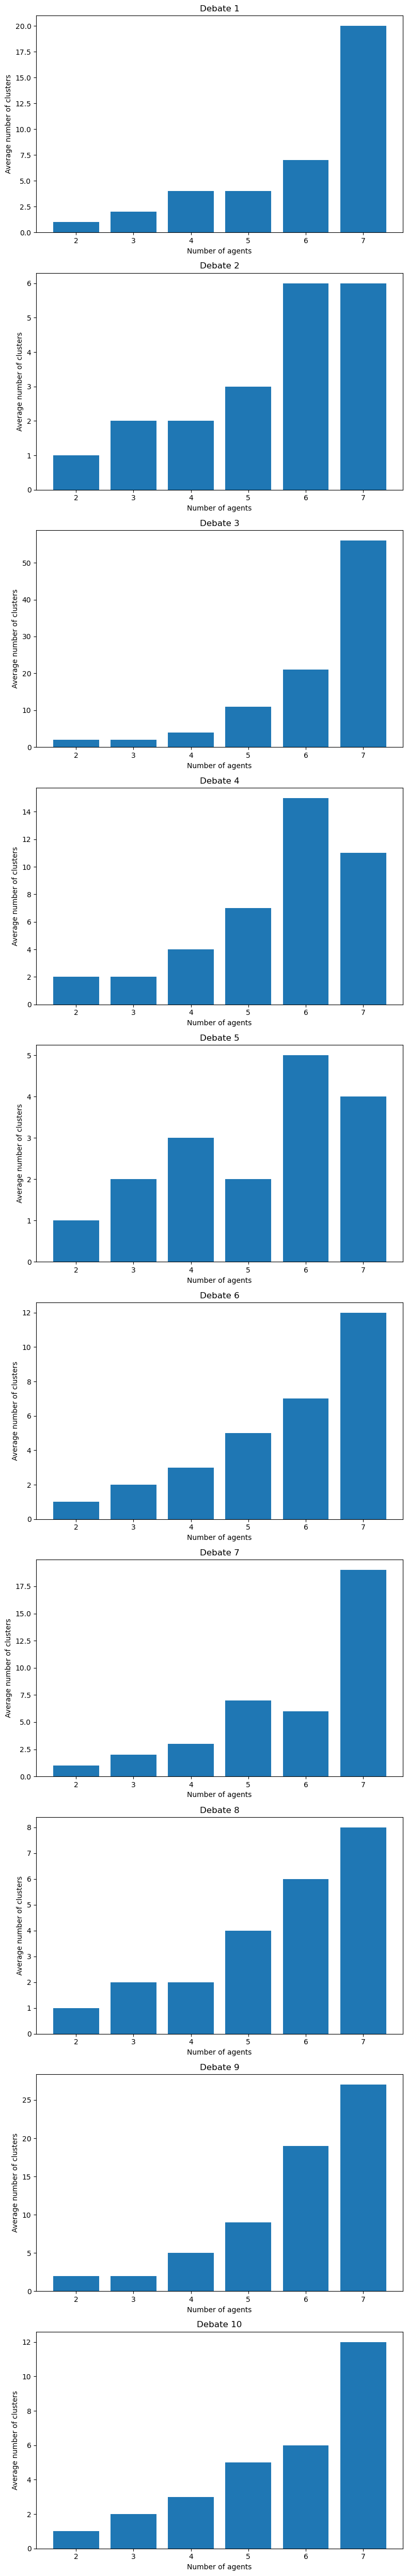

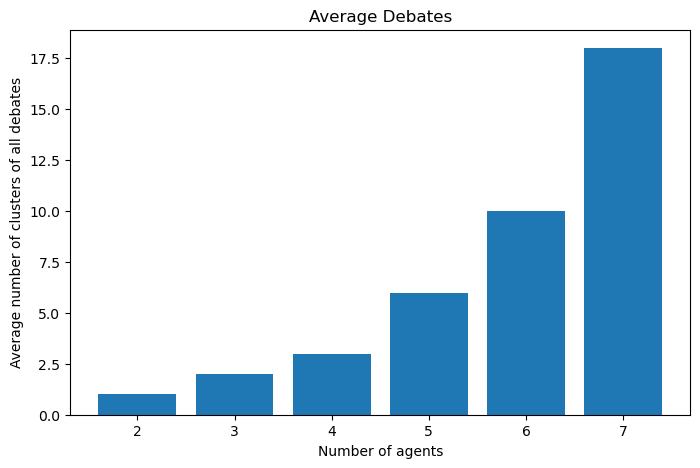

In [256]:
import matplotlib.pyplot as plt

# Plot number of clusters against number of agents for each debate
number_of_agents = list(cluster_counts_list[0].keys())
cluster_values = [list(d.values()) for d in cluster_counts_list]

fig, axes = plt.subplots(nrows=len(cluster_values), ncols=1, figsize=(8, 5*len(cluster_values)))

for i, ax in enumerate(axes):
    ax.bar(range(len(cluster_values[i])), cluster_values[i], tick_label=[n for n in number_of_agents])
    ax.set_xlabel("Number of agents")
    ax.set_ylabel("Average number of clusters")
    ax.set_title(f"Debate {i+1}")

plt.tight_layout()
plt.show()

# Calculate and plot the average number of clusters across all debates
avg_debate = []
sum = 0
for i in range(len(number_of_agents)):
    for j in range(len(cluster_values)):
        sum += cluster_values[j][i] 
    avg_debate.append(round(sum/len(cluster_values)))
    sum = 0

plt.figure(figsize=(8, 5))
plt.bar(range(len(avg_debate)), [n_cluster for n_cluster in avg_debate], tick_label=[n for n in number_of_agents])
plt.xlabel("Number of agents") 
plt.ylabel("Average number of clusters of all debates") 
plt.title(f"Average Debates")
plt.show()


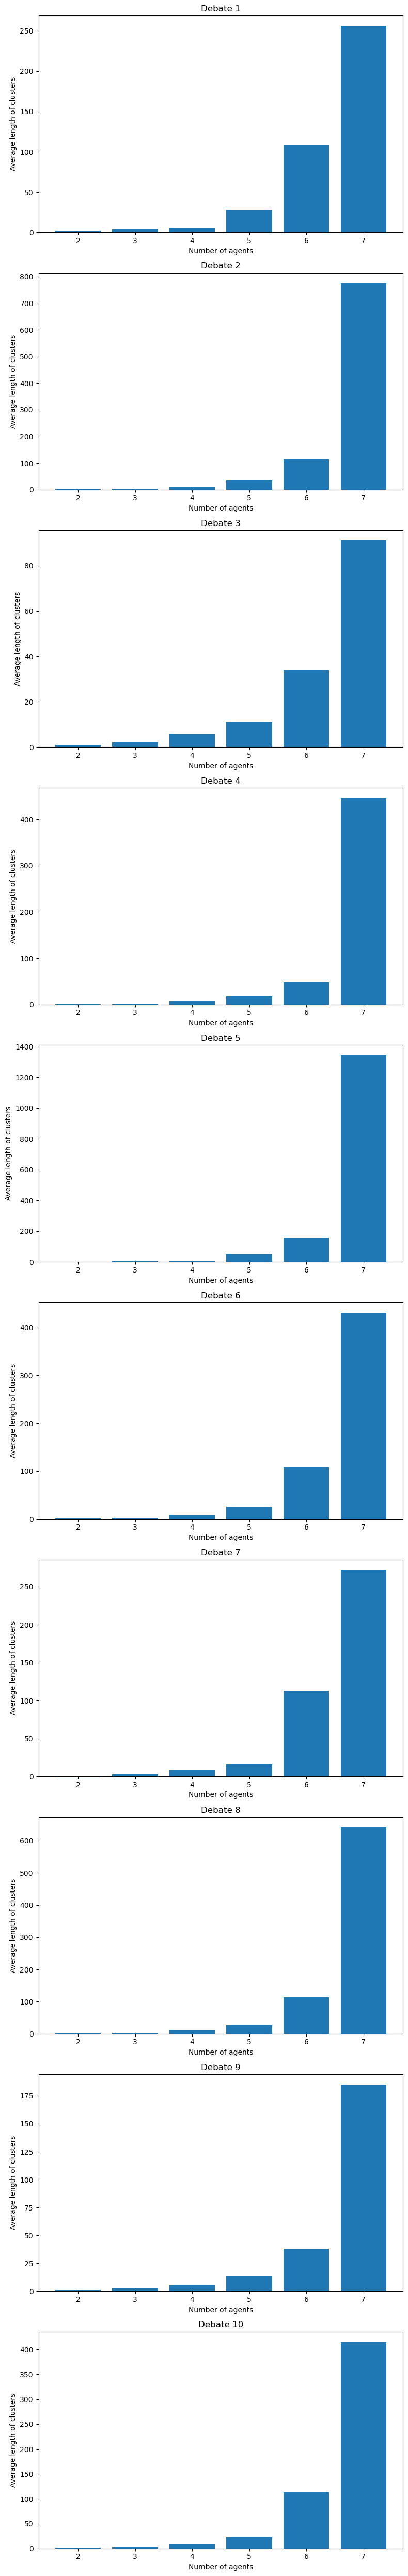

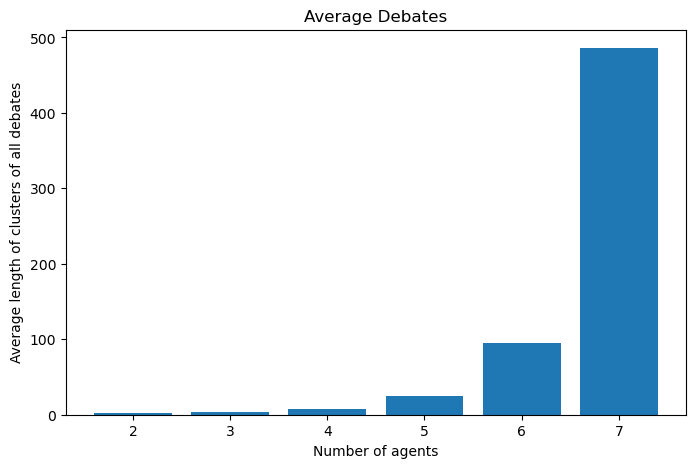

In [257]:
import matplotlib.pyplot as plt

# Plot average length of clusters against number of agents for each debate
number_of_agents = list(cluster_length_list[0].keys())
cluster_values = [list(d.values()) for d in cluster_length_list]

fig, axes = plt.subplots(nrows=len(cluster_values), ncols=1, figsize=(8, 5*len(cluster_values)))

for i, ax in enumerate(axes):
    ax.bar(range(len(cluster_values[i])), cluster_values[i], tick_label=[n for n in number_of_agents])
    ax.set_xlabel("Number of agents")
    ax.set_ylabel("Average length of clusters")
    ax.set_title(f"Debate {i+1}")

plt.tight_layout()
plt.show()

# Calculate and plot the average length of clusters across all debates
avg_debate = []
sum = 0
for i in range(len(number_of_agents)):
    for j in range(len(cluster_values)):
        sum += cluster_values[j][i] 
    avg_debate.append(round(sum/len(cluster_values)))
    sum = 0

plt.figure(figsize=(8, 5))
plt.bar(range(len(avg_debate)), [n_cluster for n_cluster in avg_debate], tick_label=[n for n in number_of_agents])
plt.xlabel("Number of agents") 
plt.ylabel("Average length of clusters of all debates") 
plt.title(f"Average Debates")
plt.show()
